In [1]:
import torch as t
from torch import nn
from torchvision.models import vgg16

In [15]:
def caffevgg16(vgg16path):
    # the 30th layer of features is relu of conv5_3
    model = vgg16(pretrained=False)
    caffevgg = t.load(vgg16path)
    caffekeys = list(caffevgg.keys())
    i = 0
    for name, para in model.state_dict().items():
        para.copy_(caffevgg[caffekeys[i]])
        i += 1
    features = list(model.features)[:30]
    classifier = model.classifier

    classifier = list(classifier)
    del classifier[6]
    use_drop = True
    if not use_drop:
        del classifier[5]
        del classifier[2]
    classifier = nn.Sequential(*classifier)

    # freeze top4 conv
    for layer in features[:10]:
        for p in layer.parameters():
            p.requires_grad = False

    return nn.Sequential(*features), classifier

In [16]:
feature,classifier = caffevgg16('vgg16-00b39a1b.pth')

In [20]:
model = vgg16(pretrained=False)

In [25]:
type(feature)

torch.nn.modules.container.Sequential

In [26]:
type(classifier)

torch.nn.modules.container.Sequential

In [29]:
model.state_dict().keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [1]:
from torchvision.datasets import VOCDetection

In [3]:
voc2007 = VOCDetection('./','2007','val',False)

In [6]:
a,b = voc2007[0]

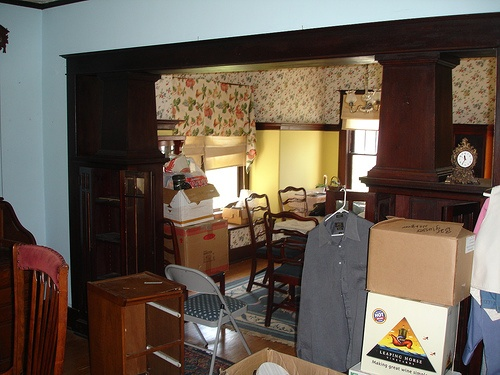

In [7]:
a

In [10]:
b

{'annotation': {'folder': 'VOC2007',
  'filename': '000005.jpg',
  'source': {'database': 'The VOC2007 Database',
   'annotation': 'PASCAL VOC2007',
   'image': 'flickr',
   'flickrid': '325991873'},
  'owner': {'flickrid': 'archintent louisville', 'name': '?'},
  'size': {'width': '500', 'height': '375', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'chair',
    'pose': 'Rear',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '263', 'ymin': '211', 'xmax': '324', 'ymax': '339'}},
   {'name': 'chair',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '165', 'ymin': '264', 'xmax': '253', 'ymax': '372'}},
   {'name': 'chair',
    'pose': 'Unspecified',
    'truncated': '1',
    'difficult': '1',
    'bndbox': {'xmin': '5', 'ymin': '244', 'xmax': '67', 'ymax': '374'}},
   {'name': 'chair',
    'pose': 'Unspecified',
    'truncated': '0',
    'difficult': '0',
    'bndbox': {'xmin': '241', 'ymin': '194', 'xmax': '295',

In [11]:
type(a)

PIL.Image.Image